## Import packages

In [1]:
from ISLP import load_data
import pandas as pd
import numpy as np
from ISLP.models import summarize
from matplotlib.pyplot import subplots

## Simple Linear Regression

Simple Linear Regression is an approach to predict a quantitative response Y based on a single predictor X, assuming there is approximately a linear relationship between X and Y.

$$
y \approx \beta_0 + \beta_1 x \tag{1}
$$

In equation 1, $\beta_0$ and $\beta_1$ are two unknown constants that represent the *intercept* and *slope* in the linear model. $\beta_0$ and $\beta_1$ are also known as the model *coefficients* or *parameters*. Once we have used our training data to produce estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ for the model coefficients, we can predict future $\hat{y}$ by computing:

$$
\hat{y} \approx \hat{\beta_0} + \hat{\beta_1} x \tag{2}
$$

Let's first load the Boston dataset using the `load_data` method from the `ISLP` package:

In [2]:
Boston_dataset = load_data(dataset="Boston")

We start by fitting simple linear regression model with `lstat` to be the only predictor and `medv` to be the response.

In [3]:
X = Boston_dataset['lstat']
y = Boston_dataset['medv']

## Least Squares Method

The Least Squares Method is used to estimate $\beta_0$ and $\beta_1$ of formula (2):

$$
\hat{\beta_1} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} \\

\hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x}
$$

We now attempt to calculate $\hat{\beta_1}$ and $\hat{\beta_0}$ by first calculate $\bar{x}$ and $\bar{y}$:

In [4]:
X_avg = np.mean(X)
y_avg = np.mean(y)

Then, fill in $\hat{\beta_1}$ and $\hat{\beta_0}$:

In [5]:
beta_1_hat = np.sum((X - X_avg) * (y - y_avg)) / np.sum((X - X_avg) ** 2)
beta_0_hat = y_avg - beta_1_hat * X_avg

Print out the value of $\hat{\beta_1}$ and $\hat{\beta_0}$:

In [6]:
print(beta_1_hat)
print(beta_0_hat)

-0.9500493537579907
34.5538408793831


## Using libraries

### Using *Scikit-learn* library:

Import `sklearn` module and call the method to fit the linear regression model with the data.

In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(np.reshape(X.to_numpy(), (-1, 1)), np.reshape(y.to_numpy(), (-1, 1)))

Print out the value of $\hat{\beta_1}$ and $\hat{\beta_0}$:

In [8]:
print(reg.coef_)
print(reg.intercept_)

[[-0.95004935]]
[34.55384088]


What is your comment about $\hat{\beta_1}$ and $\hat{\beta_0}$?

Looking at $\hat{\beta_1}$ and $\hat{\beta_0}$, we have the following comments:
- The relationship between the predictor and the response is negative, as $\hat{\beta_1} < 0$.
- When none of the population has low status, the median value of owner-occupied homes (`medv`) will be $34553, on average.
- For each 1% increase in the percentage of lower status of the population (`lstat`), there will be an average decrease in median value of owner-occupied homes (`medv`) of $950.

### Using *statsmodels* library:

Import `statsmodels` module and call the method to fit the linear regression model with the data.

In [9]:
import statsmodels.api as sm

X_mod = pd.DataFrame({'intercept': np.ones(Boston_dataset.shape[0]), 'lstat': X})
model = sm.OLS(y, X_mod)
results = model.fit()

Print out the value of $\hat{\beta_1}$ and $\hat{\beta_0}$:

In [10]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


What is your comment about $\hat{\beta_1}$ and $\hat{\beta_0}$?

Looking at the summary of the `results`, we have the following comments, apart from those given above, about $\hat{\beta_1}$ and $\hat{\beta_0}$:
- As the *p*-value is sufficiently small, we can reject the null hypothesis that $\hat{\beta_1} = 0$ and $\hat{\beta_0} = 0$. Therefore, there is some relationship between `lstat` and `medv`.
- The standard errors of $\hat{\beta_1}$ and $\hat{\beta_0}$ are very small compared to the coefficients themselves. Hence we can conclude that $\beta_1 \neq 0$ and $\beta_0 \neq 0$.

## Plotting the Simple Linear Regression line

We now produce the scatter plot of `medv` and `lstat` using `DataFrame.plot.scatter()`. Then use `axline()` to draw the Simple Linear Regression line.

[]

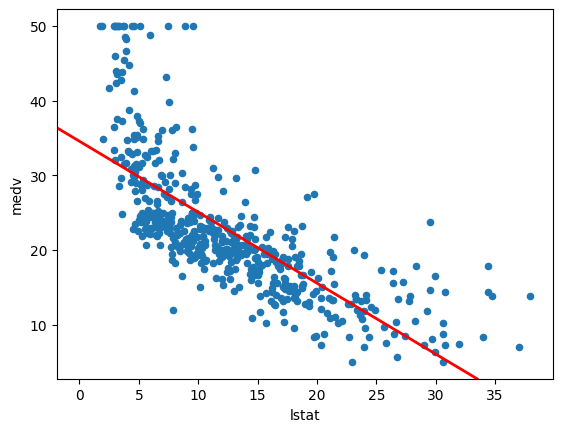

In [11]:
ax = Boston_dataset.plot.scatter('lstat', 'medv')
ax.axline((0, results.params['intercept']), slope=results.params['lstat'], color='red', linewidth=2)
ax.plot()

## Diagnostic Plots

### 1. Checking the Non-linearity of the Data

We plot the residual plot of the linear regression model of `medv` on `lstat`.

[]

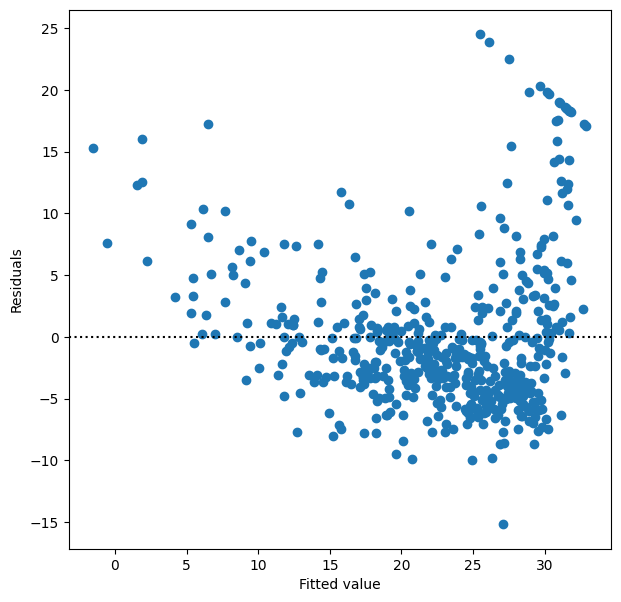

In [12]:
ax = subplots(figsize=(7,7))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residuals')
ax.axhline(0, color='black', linestyle=':')
ax.plot()

As can be seen above, there is a strong pattern in the residuals, indicating non-linearity in the data.

Therefore, we perform linear regression of `medv` on $\sqrt{X}$ non-linear transformation of `lstat`.

[]

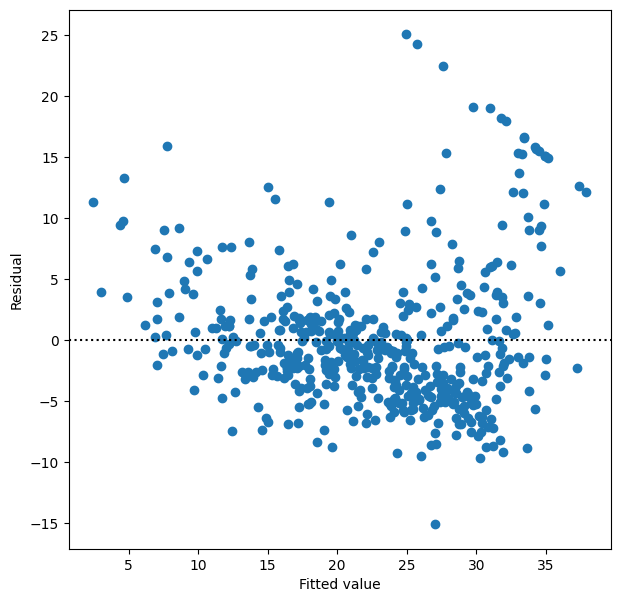

In [13]:
Boston_dataset_transform = Boston_dataset
Boston_dataset_transform['lstat_sqr'] = np.sqrt(Boston_dataset_transform['lstat'])
X_sqrt = Boston_dataset_transform['lstat_sqr']

X_mod_sqrt = pd.DataFrame({'intercept': np.ones(Boston_dataset.shape[0]), 'lstat_sqr': X_sqrt})
model_sqrt = sm.OLS(y, X_mod_sqrt)
results_sqrt = model_sqrt.fit()

ax = subplots(figsize=(7,7))[1]
ax.scatter(results_sqrt.fittedvalues, results_sqrt.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, color='black', linestyle=':')
ax.plot()

From the plot, we can see weaker pattern in the residuals compared to the linear regression of `medv` on `lstat`, showing the true relationship between `medv` and `lstat` is far from linear.

### 2. Correlation of Error Terms

For checking correlation of error terms, we will sort the `resid` by `age` and plot it.

[]

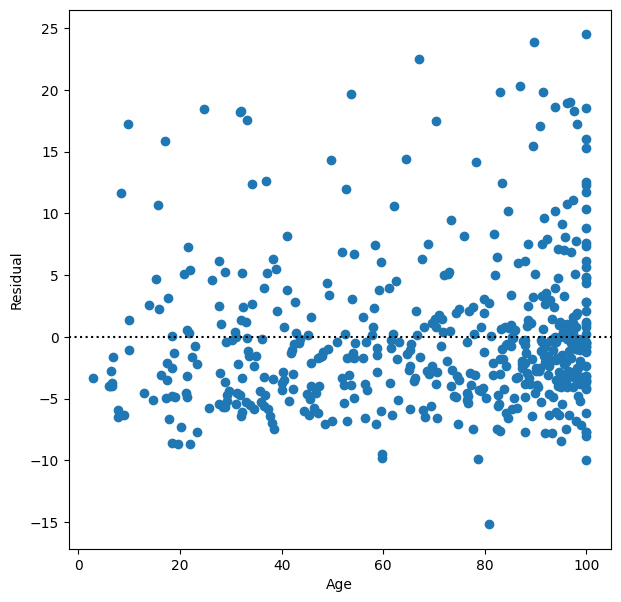

In [14]:
Boston_dataset_resid = Boston_dataset
Boston_dataset_resid['resid'] = results.resid

sorted_Boston_dataset_resid = Boston_dataset_resid.sort_values(by='age')

ax = subplots(figsize=(7,7))[1]
ax.scatter(sorted_Boston_dataset_resid['age'], sorted_Boston_dataset_resid['resid'])
ax.set_xlabel('Age')
ax.set_ylabel('Residual')
ax.axhline(0, color='black', linestyle=':')
ax.plot()

As the plot shown, the residuals appear to be quite random. Therefore, we can conclude that residuals have low level of correlation based on age.

### 3. Outliers

To detect outliers, we plot the `medv` and `lstat`, and the residual plot of the linear regression model of `medv` on `lstat`.

[]

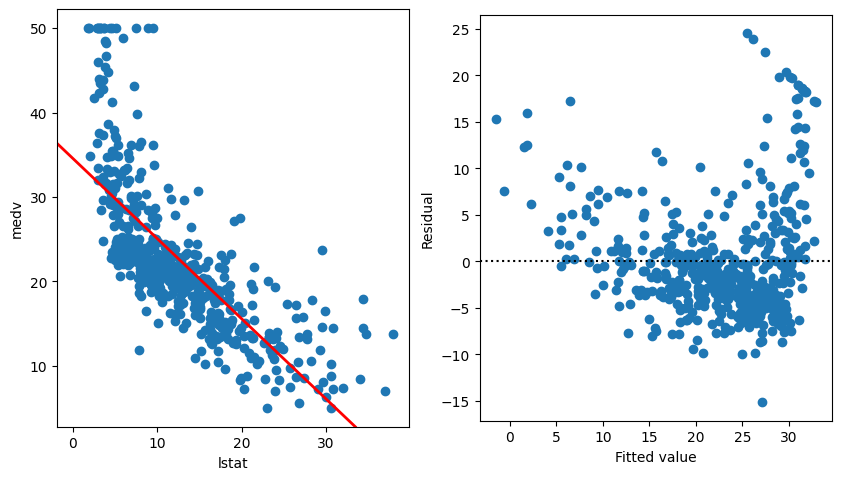

In [15]:
fig, ax = subplots(1, 2, figsize=(10, 10))

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

ax[0].scatter(Boston_dataset['lstat'], Boston_dataset['medv'])
ax[0].set_xlabel('lstat')
ax[0].set_ylabel('medv')
ax[0].axline((0, results.params['intercept']), slope=results.params['lstat'], color='red', linewidth=2)
ax[0].plot()

ax[1].scatter(results.fittedvalues, results.resid)
ax[1].set_xlabel('Fitted value')
ax[1].set_ylabel('Residual')
ax[1].axhline(0, color='black', linestyle=':')
ax[1].plot()

From two plots above, we can see there are many outliers above the `medv` value of 40, and one outlier with the resudual value of around -15.